<a href="https://colab.research.google.com/github/Gaythri-Prabha/Car-Price-Prediction-Project/blob/main/Car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

US-Car-Pricing-Analysis

1.loading and preprocessing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/CarPrice_Assignment.csv')
df = pd.DataFrame(data)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.describe()


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
df.duplicated().sum()


0

feature engineering and encoding

In [ ]:
# Drop 'CarName' as it's no longer needed
df.drop(columns=['CarName', 'car_ID'], inplace=True)

In [ ]:
categorical_cols = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
                    'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

detecting and capping outliers

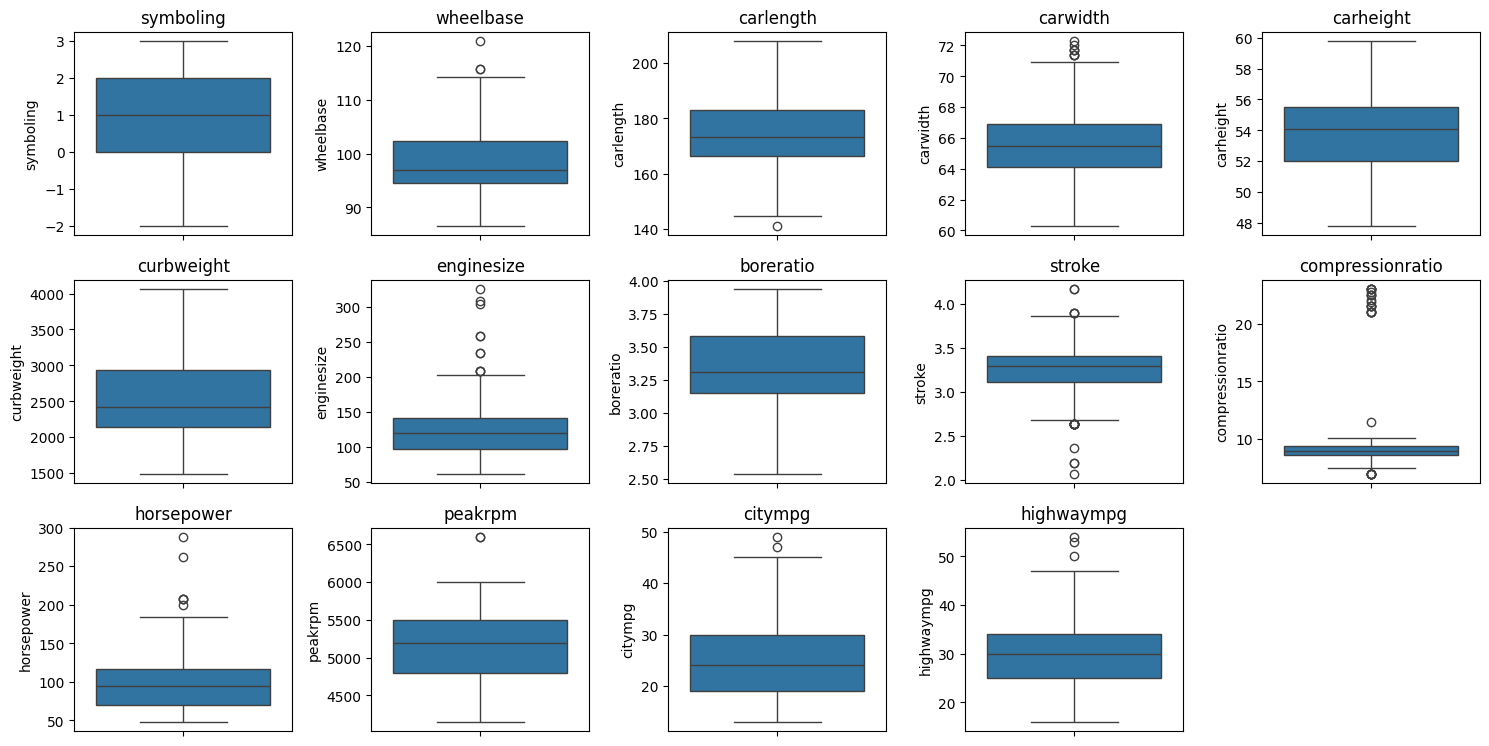

In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('price')
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 5, i)  # Adjust layout for better visibility
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [ ]:
def cap_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap values outside the bounds
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('price')
cap_outliers(df, numeric_cols)


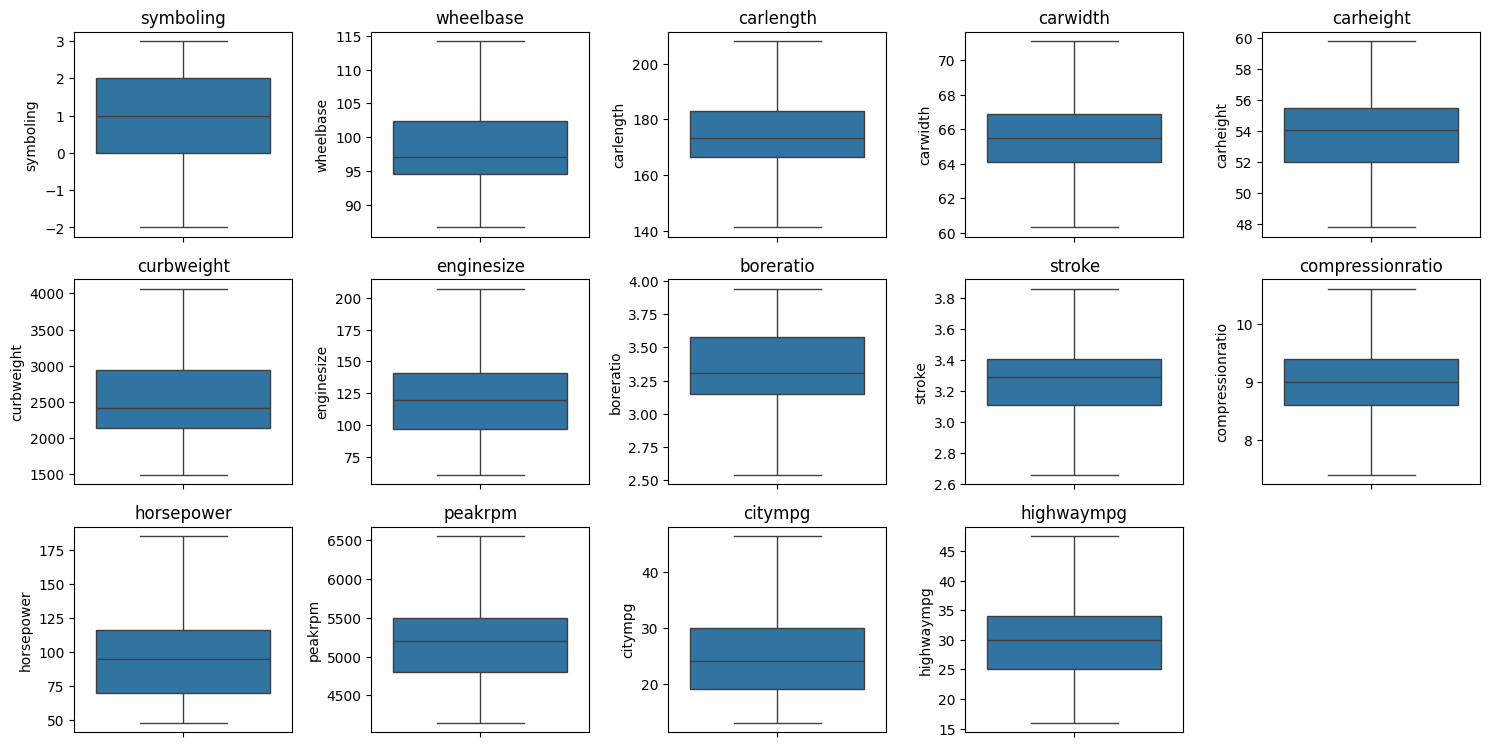

In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('price')
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 5, i)  # Adjust layout for better visibility
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])




spliting data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
X = df.drop(columns=['price'])
y = df['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

implementing models

In [ ]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR()
}


In [ ]:
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results[name] = {
        "R-squared": r2_score(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred)
    }

In [ ]:
results_df = pd.DataFrame(results).T
print(results_df)

                             R-squared           MSE          MAE
Linear Regression             0.867032  1.049703e+07  2249.005532
Decision Tree Regressor       0.910071  7.099346e+06  1818.052854
Random Forest Regressor       0.957980  3.317232e+06  1267.222939
Gradient Boosting Regressor   0.923792  6.016128e+06  1691.643657
Support Vector Regressor     -0.099465  8.679622e+07  5694.305066


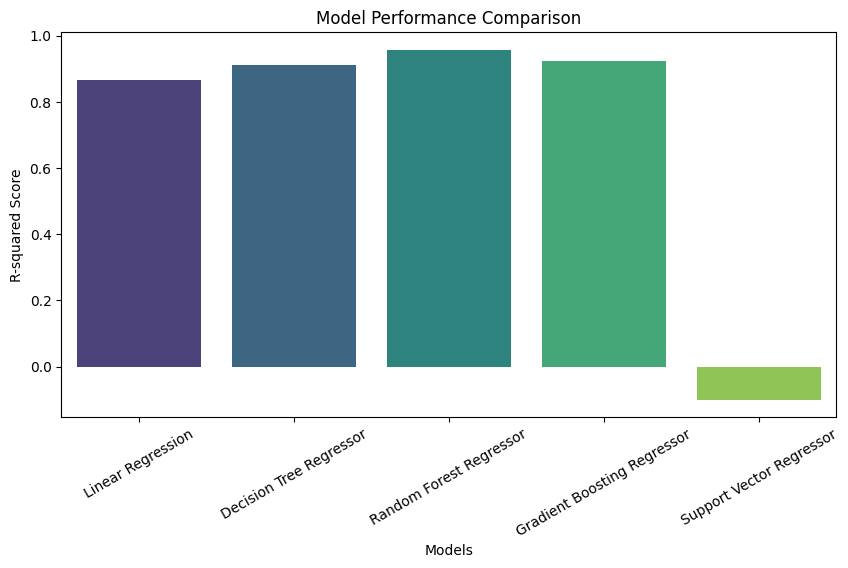

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x=results_df.index, y=results_df["R-squared"], palette="viridis")
plt.xticks(rotation=30)
plt.ylabel("R-squared Score")
plt.xlabel('Models')
plt.title("Model Performance Comparison")
plt.show()

Five regression models were tested to predict car prices, evaluated using R², Mean Squared Error (MSE), and Mean Absolute Error (MAE).

- Best Model: Random Forest Regressor (R² = 0.958), explaining 95.8% of price
variance with the lowest errors (MSE: 3.28M, MAE: 1284)—making it the most accurate predictor.

 -Second Best: Gradient Boosting Regressor (R² = 0.928), performing well but
slightly less effective than Random Forest.



🔹 Moderate Performers:

Linear Regression & Decision Tree Regressor (R² = 0.894) captured patterns but had higher errors, making them less precise.

Linear Regression struggled with non-linearity, while Decision Trees risked overfitting.

 Worst Model: Support Vector Regressor (SVR) (R² = -0.099, MSE: 86.8M, MAE: 5695) completely failed, producing highly inaccurate predictions.

 Conclusion: Random Forest is the best model for predicting car prices due to its high accuracy and low error rates.

Feature Selection

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)

enginesize               0.546034
curbweight               0.299270
highwaympg               0.046416
horsepower               0.032902
carwidth                 0.012337
carlength                0.008880
wheelbase                0.007321
peakrpm                  0.006888
citympg                  0.006252
boreratio                0.005667
stroke                   0.004954
compressionratio         0.004830
carheight                0.003670
fuelsystem_mpfi          0.002084
cylindernumber_four      0.001795
carbody_sedan            0.001283
carbody_hatchback        0.001258
aspiration_turbo         0.001113
symboling                0.001094
enginetype_ohc           0.000996
drivewheel_rwd           0.000846
carbody_hardtop          0.000766
cylindernumber_six       0.000618
drivewheel_fwd           0.000540
doornumber_two           0.000450
carbody_wagon            0.000234
fuelsystem_2bbl          0.000223
fuelsystem_spdi          0.000205
enginetype_l             0.000179
fuelsystem_idi

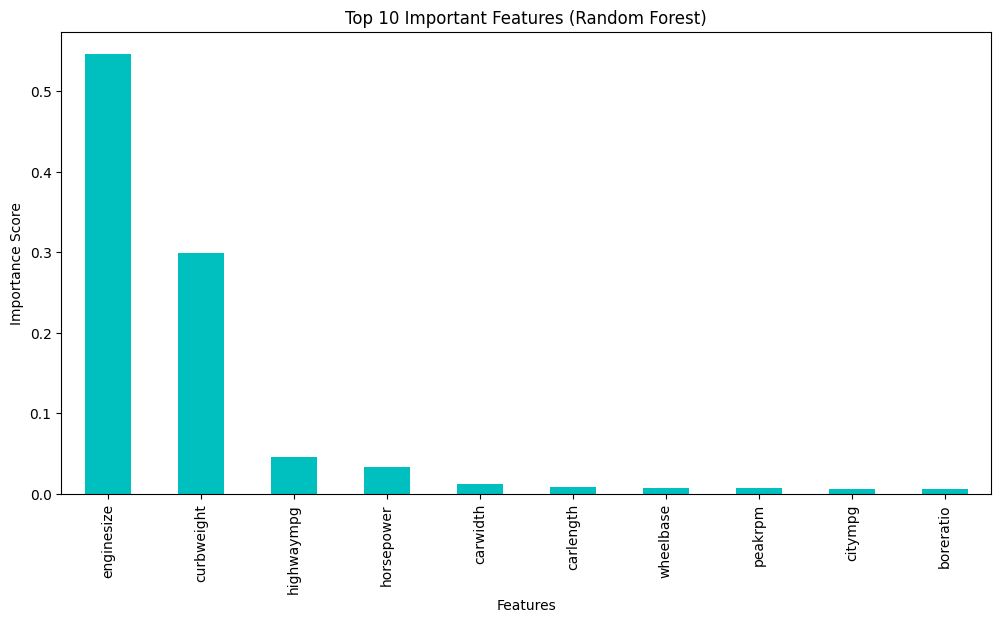

In [ ]:
feature_importances = feature_importances.sort_values(ascending=False)
print(feature_importances)

plt.figure(figsize=(12, 6))
feature_importances[:10].plot(kind='bar', color='c')  # Top 10 important features
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Top 10 Important Features (Random Forest)")
plt.show()


In [ ]:
# Recursive Feature Elimination (RFE) with Linear Regression

from sklearn.feature_selection import RFE
rfe = RFE(LinearRegression(), n_features_to_select=10)
rfe.fit(X_train, y_train)

# Important features selected by RFE
selected_features = X_train.columns[rfe.support_]
print("Selected Features by RFE:", selected_features.tolist())


Selected Features by RFE: ['curbweight', 'enginelocation_rear', 'enginetype_dohcv', 'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_twelve', 'cylindernumber_two']


Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}




In [ ]:
# Initialize GridSearchCV
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and model performance
print("Best Parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_


Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:

# Evaluate tuned model
y_pred_tuned = best_rf.predict(X_test)
r2_tuned = r2_score(y_test, y_pred_tuned)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)

print(f"Tuned Model R²: {r2_tuned:.4f}, MSE: {mse_tuned:.2f}, MAE: {mae_tuned:.2f}")

Tuned Model R²: 0.9585, MSE: 3273484.48, MAE: 1230.50
